# Time Series ARIMA Models

#### https://sites.google.com/site/econometricsacademy/econometrics-models/time-series-arima-models

In [7]:
install.packages("tseries")
install.packages("dynlm")
library("tseries")
library("magrittr")
library("data.table")
library("tidyverse")
library("OECD")
library("ggplot2")
library("car")


The downloaded binary packages are in
	/var/folders/bm/w6ympyb55m92n8f6vlnzdx7w0000gn/T//RtmpepEm1o/downloaded_packages

The downloaded binary packages are in
	/var/folders/bm/w6ympyb55m92n8f6vlnzdx7w0000gn/T//RtmpepEm1o/downloaded_packages


In [24]:
mydata = get_dataset('QNA', filter = list("FRA", "B1_GA", "LNBQRSA", "Q"), start_time = 1995, end_time = 2019)  
mydata$trend <- 1:nrow(mydata)
mydata %>% head

FREQUENCY,LOCATION,MEASURE,ObsValue,POWERCODE,REFERENCEPERIOD,SUBJECT,TIME_FORMAT,Time,UNIT,trend
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
Q,FRA,LNBQRSA,393086,6,2014,B1_GA,P3M,1995-Q1,EUR,1
Q,FRA,LNBQRSA,394985,6,2014,B1_GA,P3M,1995-Q2,EUR,2
Q,FRA,LNBQRSA,395285,6,2014,B1_GA,P3M,1995-Q3,EUR,3
Q,FRA,LNBQRSA,395967,6,2014,B1_GA,P3M,1995-Q4,EUR,4
Q,FRA,LNBQRSA,398440,6,2014,B1_GA,P3M,1996-Q1,EUR,5
Q,FRA,LNBQRSA,399135,6,2014,B1_GA,P3M,1996-Q2,EUR,6


In [25]:
options(repr.plot.width = 10, repr.plot.height = 4)

In [52]:
# Defining variables

# Y <- mydata$ObsValue
# d.Y <- diff(as.numeric(Y))

Y <- as.numeric(mydata$ObsValue)
d.Y <- diff(as.numeric(Y))

lY <- lag(Y)[-1]
# #c.Y <- diff(Y)/lY
# lYs <- lY[-1]


# 1. Identification step
## 1.1  Examine the time plot of the series.
                o Identify outliers, missing values, and structural breaks in the data.
                o Non-stationary variables may have a pronounced trend or have changing variance.
                o Transform the data if needed. Use logs, differencing, or detrending.
                         Using logs works if the variability of data increases over time.
                         Differencing the data can remove trends. But over-differencing may introduce dependence when none exists.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 393086  464662  508961  497029  533527  584958 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-8468.0   688.5  2164.0  1915.1  3565.0  6162.0 

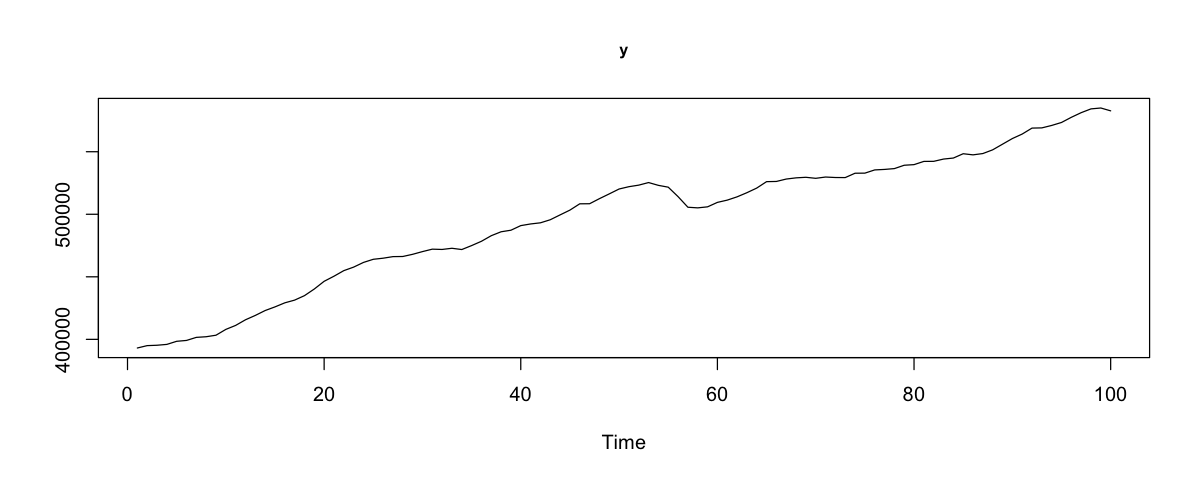

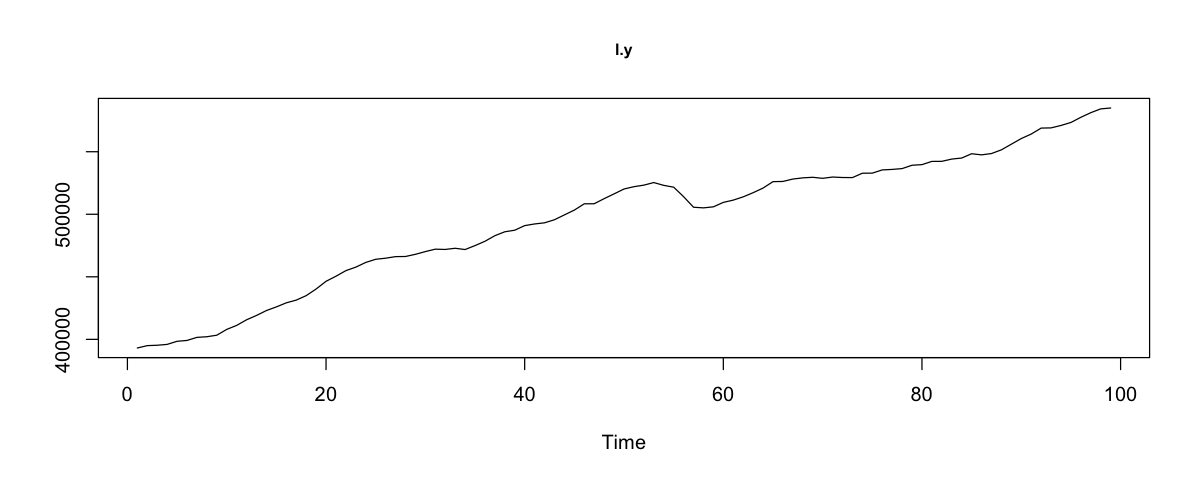

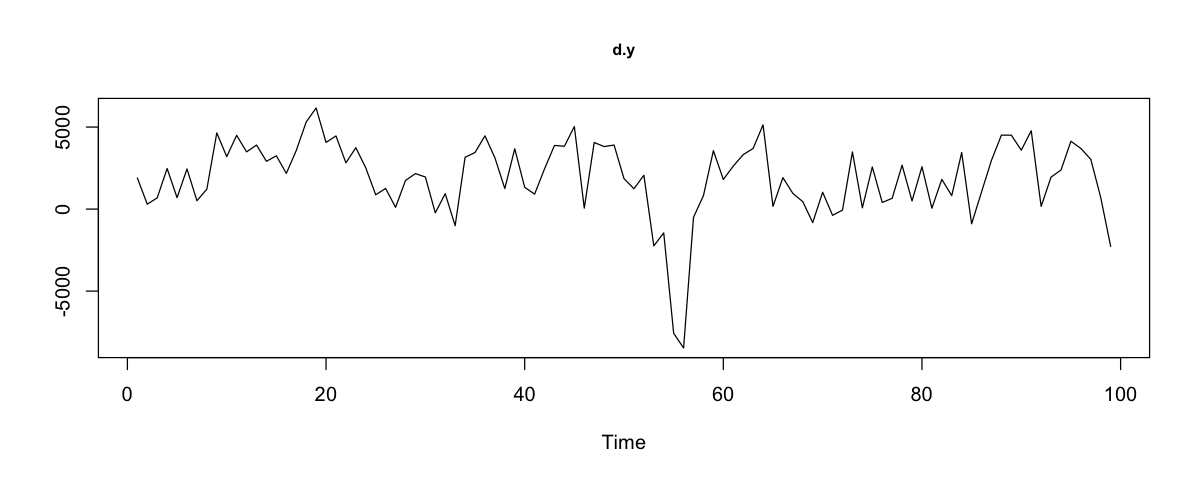

In [53]:
# Descriptive statistics and plotting the data
summary(Y)
summary(d.Y)

plot.ts(Y, ylab = NA, main = 'y', cex.main = 0.8)
plot.ts(lY,  ylab = NA, main = 'l.y', cex.main = 0.8)
plot.ts(d.Y,  ylab = NA, main = 'd.y', cex.main = 0.8)

In [54]:
# Dickey-Fuller test for variable
adf.test(Y, alternative="stationary", k=0)
adf.test(Y, alternative="explosive", k=0)


	Augmented Dickey-Fuller Test

data:  Y
Dickey-Fuller = -1.4565, Lag order = 0, p-value = 0.8018
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  Y
Dickey-Fuller = -1.4565, Lag order = 0, p-value = 0.1982
alternative hypothesis: explosive


In [55]:
trends <- mydata$trend[-1]
summary(lm(d.Y ~ lY, na.action=na.omit))
summary(lm(d.Y ~ lY + trends, na.action=na.omit))


Call:
lm(formula = d.Y ~ lY, na.action = na.omit)

Residuals:
     Min       1Q   Median       3Q      Max 
-10249.7  -1213.9    225.7   1706.6   3830.7 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)  5.608e+03  2.176e+03   2.577   0.0115 *
lY          -7.442e-03  4.362e-03  -1.706   0.0912 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2266 on 97 degrees of freedom
Multiple R-squared:  0.02914,	Adjusted R-squared:  0.01913 
F-statistic: 2.911 on 1 and 97 DF,  p-value: 0.09118



Call:
lm(formula = d.Y ~ lY + trends, na.action = na.omit)

Residuals:
     Min       1Q   Median       3Q      Max 
-10107.7  -1285.0    276.3   1591.7   3876.3 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)  1.412e+04  7.996e+03   1.766   0.0806 .
lY          -2.869e-02  1.970e-02  -1.457   0.1485  
trends       3.979e+01  3.598e+01   1.106   0.2715  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2263 on 96 degrees of freedom
Multiple R-squared:  0.04135,	Adjusted R-squared:  0.02138 
F-statistic: 2.071 on 2 and 96 DF,  p-value: 0.1317


In [56]:
# Augmented Dickey-Fuller test
adf.test(Y, alternative="stationary")


	Augmented Dickey-Fuller Test

data:  Y
Dickey-Fuller = -2.1471, Lag order = 4, p-value = 0.5157
alternative hypothesis: stationary


In [57]:
# DF and ADF tests for differenced variable
adf.test(d.Y, k=0)
adf.test(d.Y)

Warning message in adf.test(d.Y, k = 0):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  d.Y
Dickey-Fuller = -5.2518, Lag order = 0, p-value = 0.01
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  d.Y
Dickey-Fuller = -3.4751, Lag order = 4, p-value = 0.04795
alternative hypothesis: stationary


## 1.2 Examine the autocorrelation function (ACF) and partial autocorrelation function (PACF).
                        o Compare the sample ACF and PACF to those of various theoretical ARMA models. Use properties of ACF and PACF as a guide to 
                                   estimate plausible models and select appropriate p, d, and q.
                        o With empirical data, several models may need to be estimated.
                        o Differencing may be needed if there is a slow decay in the ACF.

#### ACF and PACF

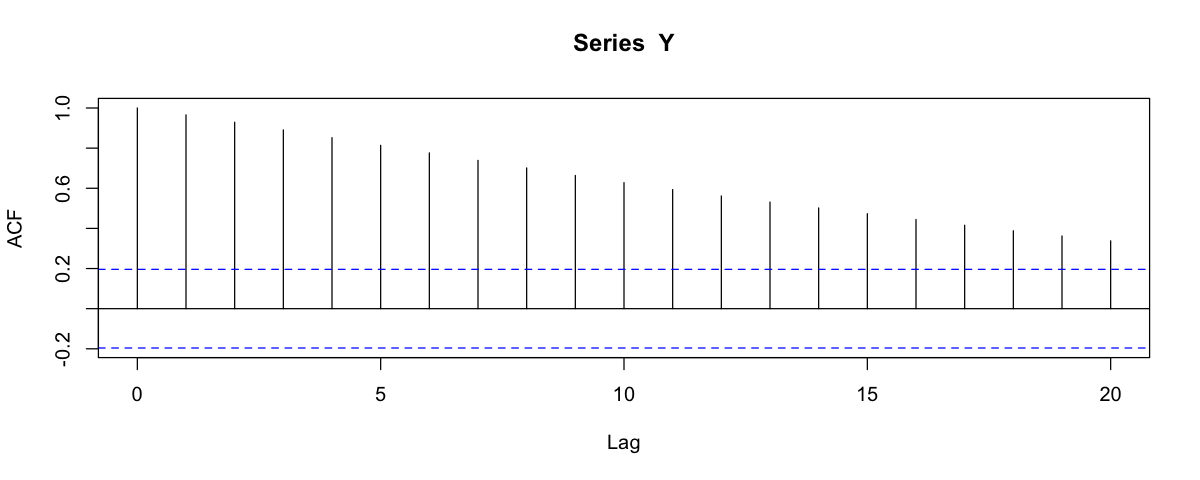

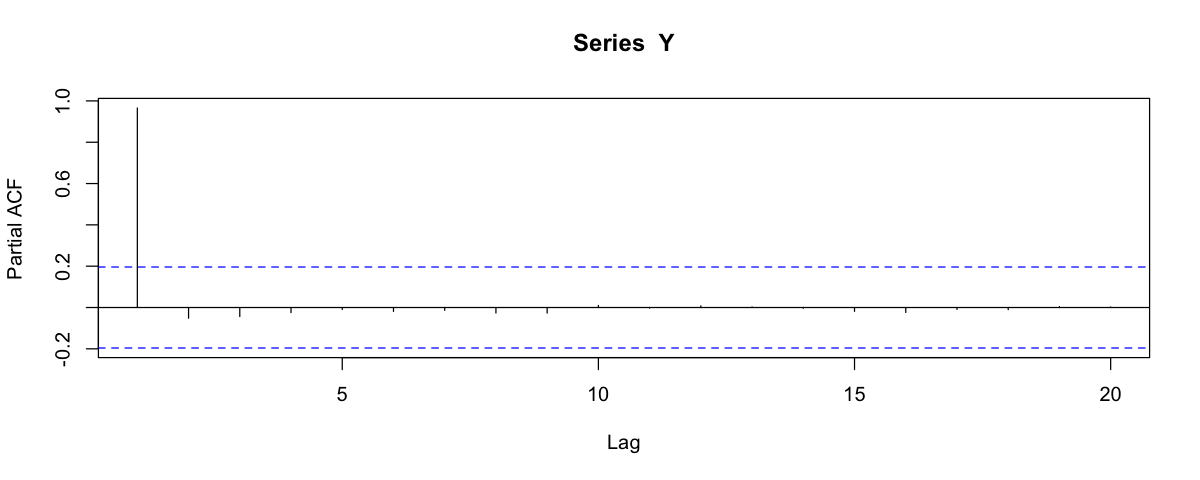

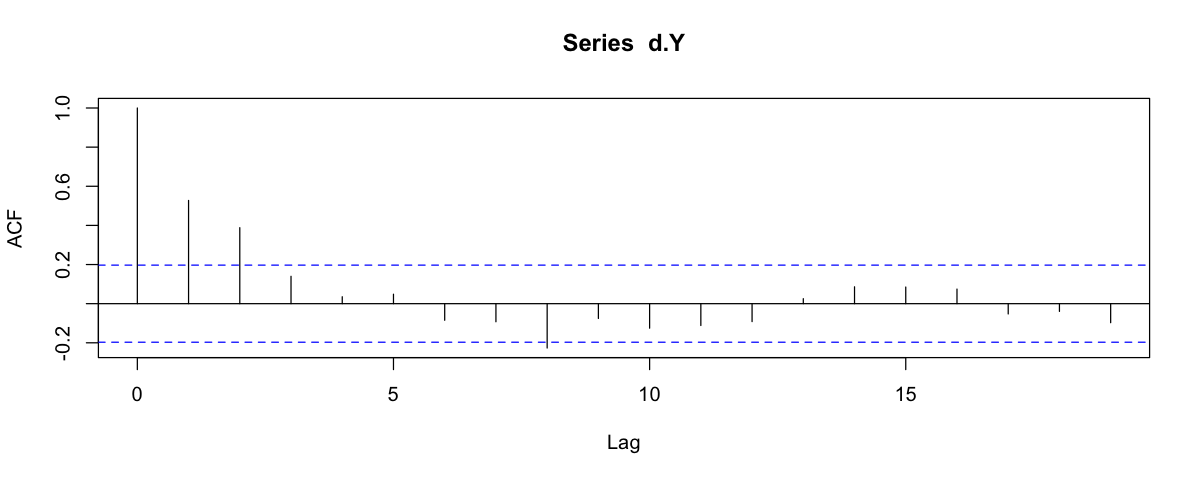

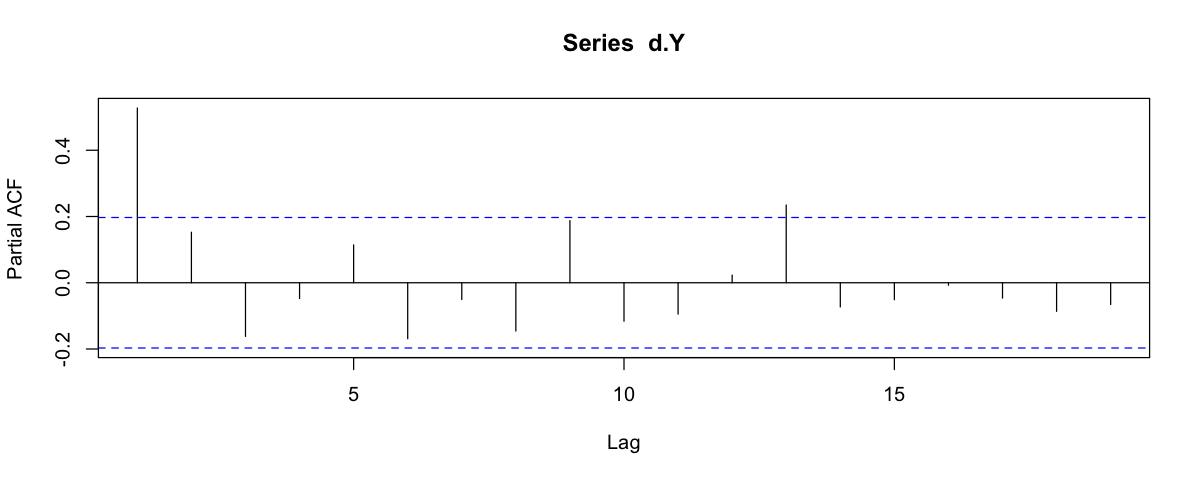

In [58]:
acf(Y)
pacf(Y)
acf(d.Y)
pacf(d.Y)

# 2. Estimation step
         Estimate ARMA models and examine the various coefficients.
         The goal is to select a stationary and parsimonious model that has significant coefficients and a good fit.

## ARIMA Models

note: 
> The "t value" is the ratio of the coefficient to the standard error.  

> The degrees of freedom (ndf) would be the number of observations minus the max order of difference in the model minus the number of estimated coefficients. 

         

#### ARIMA on original variable

In [59]:
# ARIMA(1,0,0) or AR(1)
arima(Y, order = c(1,0,0))


Call:
arima(x = Y, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.9995  492482.28
s.e.  0.0007   92451.58

sigma^2 estimated as 8846732:  log likelihood = -945.12,  aic = 1896.24

In [60]:
# ARIMA(2,0,0) or AR(2)
arima(Y, order = c(2,0,0))


Call:
arima(x = Y, order = c(2, 0, 0))

Coefficients:
         ar1      ar2  intercept
      1.7301  -0.7311  485058.97
s.e.  0.0680   0.0683   77700.99

sigma^2 estimated as 4102624:  log likelihood = -907.37,  aic = 1822.74

The problem arises in the stats::arima function when calculating the covariance matrix of the coefficients. The code is not very robust to scale effects due to large numbers, and crashes in computing the inverse of the Hessian matrix in this line:

var <- crossprod(A, solve(res$hessian * n.used, A))

The problem is avoided by simply scaling the data. For example: 

In [61]:
# ARIMA(2,0,0) or AR(2)
arima(Y/10, order = c(2,0,0))


Call:
arima(x = Y/10, order = c(2, 0, 0))

Coefficients:
         ar1      ar2  intercept
      1.7301  -0.7311  48505.897
s.e.  0.0680   0.0683   7769.143

sigma^2 estimated as 41026:  log likelihood = -677.11,  aic = 1362.22

In [62]:
# ARIMA(0,0,1) or MA(1)
arima(Y, order = c(0,0,1))


Call:
arima(x = Y, order = c(0, 0, 1))

Coefficients:
         ma1   intercept
      1.0000  496913.740
s.e.  0.0252    5334.301

sigma^2 estimated as 718408620:  log likelihood = -1163.83,  aic = 2333.66

In [64]:
# ARIMA(1,0,1) or AR(1) MA(1)
arima(Y, order = c(1,0,1))

ERROR: Error in solve.default(res$hessian * n.used, A): system is computationally singular: reciprocal condition number = 8.32394e-18


#### ARIMA on differenced variable

In [65]:
# ARIMA(1,1,0)
print("ARIMA(1,1,0)")
x1 <- arima(d.Y, order = c(1,0,0))
x1
options("scipen"=100, "digits"=4)
(1-pnorm(abs(x1$coef)/sqrt(diag(x1$var.coef))))*2 

# ARIMA(0,1,1)
print("# ARIMA(0,1,1)")
x2 <- arima(d.Y, order = c(0,0,1))
x2
options("scipen"=100, "digits"=4)
(1-pnorm(abs(x2$coef)/sqrt(diag(x2$var.coef))))*2 

# ARIMA(1,1,1)
print("# ARIMA(1,1,1)")
x3 <- arima(d.Y, order = c(1,0,1))
x3
options("scipen"=100, "digits"=4)
(1-pnorm(abs(x3$coef)/sqrt(diag(x3$var.coef))))*2 

# ARIMA(1,1,3)
print("# ARIMA(1,1,2)")
x4 <- arima(d.Y, order = c(1,0,2))
x4
options("scipen"=100, "digits"=4)
(1-pnorm(abs(x4$coef)/sqrt(diag(x4$var.coef))))*2 

# ARIMA(2,1,3)
print("# ARIMA(2,1,3)")
x5 <- arima(d.Y, order = c(2,0,3))
x5
options("scipen"=100, "digits"=4)
(1-pnorm(abs(x5$coef)/sqrt(diag(x5$var.coef))))*2 

# ARIMA(3,1,2)   THE BEST MODEL
print("# ARIMA(3,1,2) THE BEST MODEL")
x6 <- arima(d.Y, order = c(3,0,2))
x6
options("scipen"=100, "digits"=4)
(1-pnorm(abs(x6$coef)/sqrt(diag(x6$var.coef))))*2 

# ARIMA(p, 1, q) higher order p and q s do not show better fit. 
#The goal is to select a stationary and parsimonious model that has significant coefficients and a good fit.
print("# ARIMA(p, 1, q)")
x7 <- arima(d.Y, order = c(4,0,2))
x7
options("scipen"=100, "digits"=4)
(1-pnorm(abs(x7$coef)/sqrt(diag(x7$var.coef))))*2 

[1] "ARIMA(1,1,0)"



Call:
arima(x = d.Y, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.5407  1865.9227
s.e.  0.0854   415.6106

sigma^2 estimated as 3687005:  log likelihood = -889.1,  aic = 1784.21

ar1       intercept 
0.0000000002469 0.0000071359170

[1] "# ARIMA(0,1,1)"



Call:
arima(x = d.Y, order = c(0, 0, 1))

Coefficients:
        ma1  intercept
      0.373     1902.9
s.e.  0.076      281.8

sigma^2 estimated as 4191621:  log likelihood = -895.4,  aic = 1797

ma1       intercept 
0.0000008139859 0.0000000000145

[1] "# ARIMA(1,1,1)"



Call:
arima(x = d.Y, order = c(1, 0, 1))

Coefficients:
        ar1     ma1  intercept
      0.657  -0.161     1848.5
s.e.  0.116   0.138      461.2

sigma^2 estimated as 3637748:  log likelihood = -888.5,  aic = 1785

ar1           ma1     intercept 
0.00000001395 0.24254801026 0.00006131373

[1] "# ARIMA(1,1,2)"



Call:
arima(x = d.Y, order = c(1, 0, 2))

Coefficients:
        ar1    ma1    ma2  intercept
      0.278  0.203  0.423     1862.6
s.e.  0.165  0.140  0.129      412.9

sigma^2 estimated as 3396666:  log likelihood = -885.2,  aic = 1780

ar1         ma1         ma2   intercept 
0.091820775 0.147004831 0.001023626 0.000006448

[1] "# ARIMA(2,1,3)"



Call:
arima(x = d.Y, order = c(2, 0, 3))

Coefficients:
        ar1     ar2    ma1    ma2    ma3  intercept
      0.025  -0.429  0.456  0.944  0.307     1903.6
s.e.  0.190   0.136  0.194  0.089  0.159      344.3

sigma^2 estimated as 3192036:  log likelihood = -882.8,  aic = 1780

ar1           ar2           ma1           ma2           ma3 
0.89584502516 0.00168667812 0.01911802553 0.00000000000 0.05330258846 
    intercept 
0.00000003214

[1] "# ARIMA(3,1,2) THE BEST MODEL"



Call:
arima(x = d.Y, order = c(3, 0, 2))

Coefficients:
        ar1     ar2    ar3    ma1    ma2  intercept
      0.384  -0.567  0.267  0.124  0.941     1889.2
s.e.  0.110   0.116  0.114  0.047  0.069      396.5

sigma^2 estimated as 3119537:  log likelihood = -881.8,  aic = 1778

ar1          ar2          ar3          ma1          ma2    intercept 
0.0004860294 0.0000009752 0.0194829820 0.0084310403 0.0000000000 0.0000018968

[1] "# ARIMA(p, 1, q)"



Call:
arima(x = d.Y, order = c(4, 0, 2))

Coefficients:
         ar1    ar2    ar3    ar4    ma1    ma2  intercept
      -0.518  0.655  0.121  -0.24  1.101  0.102     1866.1
s.e.   0.322  0.190  0.206   0.12  0.332  0.329      396.9

sigma^2 estimated as 3134231:  log likelihood = -882.5,  aic = 1781

ar1         ar2         ar3         ar4         ma1         ma2 
0.107772120 0.000559083 0.554984712 0.045297032 0.000912444 0.757769314 
  intercept 
0.000002588

# 3. Diagnostic checking step

                 If the model fits well, then the residuals from the model should resemble a while noise process.
                            o Check for normality looking at a histogram of the residuals or by using a quantilequantile (Q-Q) plot.
                            o Check for independence by examining the ACF and PACF of the residuals, which should look like a white noise.
                            o The Ljung-Box-Pierce statistic performs a test of the magnitude of the autocorrelations of the correlations as a group.
                            o Examine goodness of fit using the Akaike Information Criteria (AIC) and Bayesian Information Criteria (BIC). 
                                            Use most parsimonious model with lowest AIC and/or BIC.

## 3.1 Check for normality looking at a histogram of the residuals or by using a quantilequantile (Q-Q) plot.

## Plotting histogram of the residuals

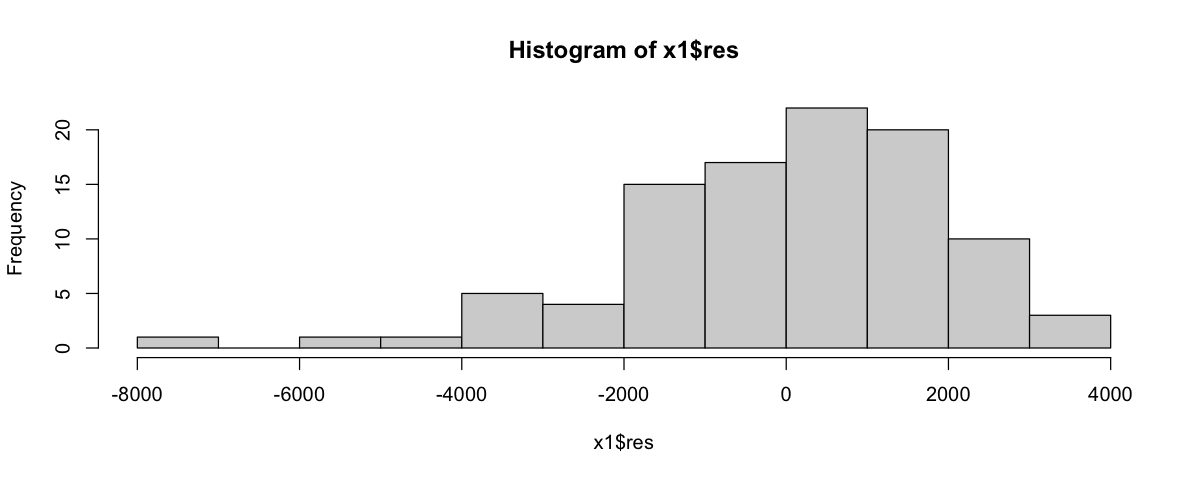

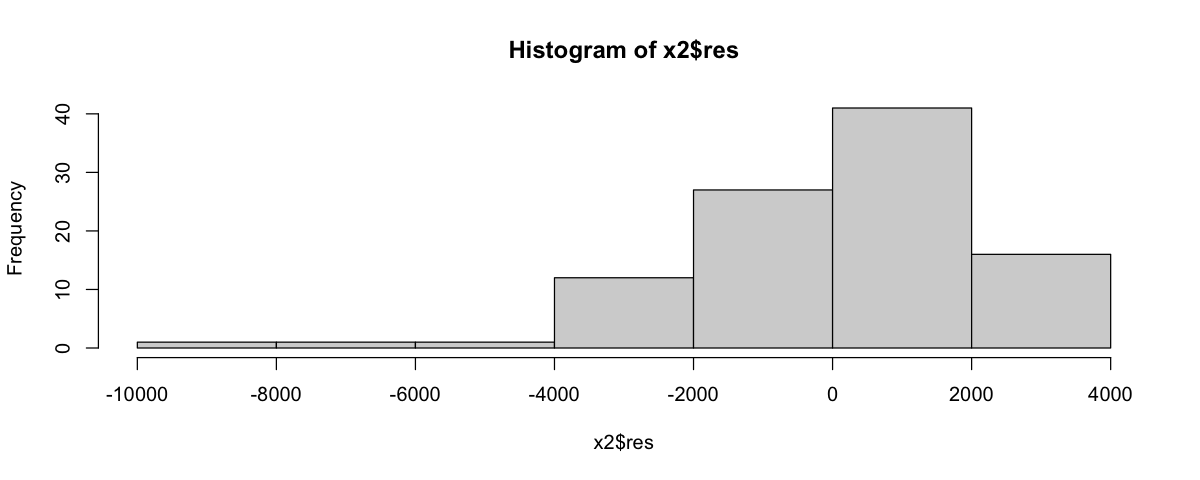

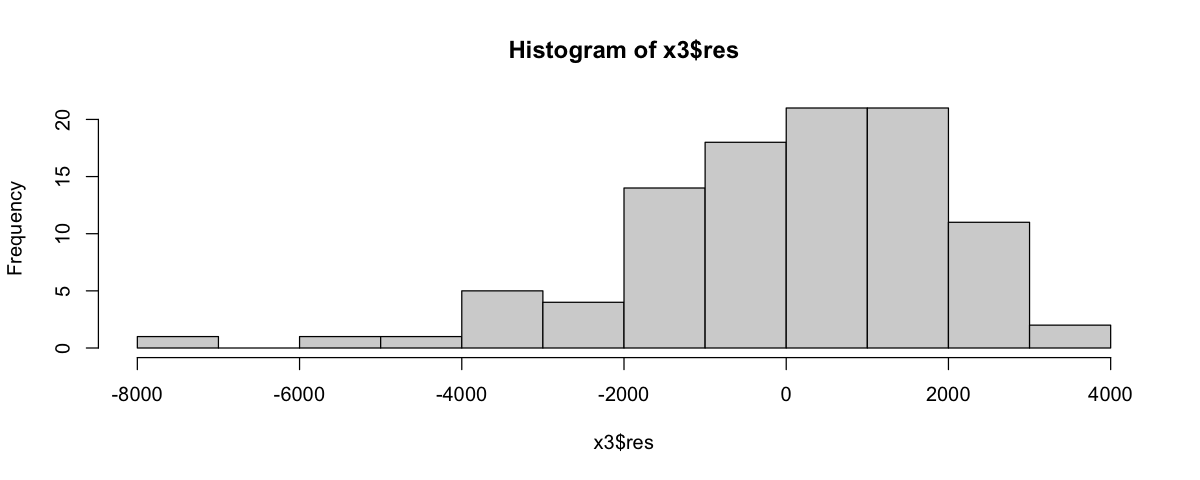

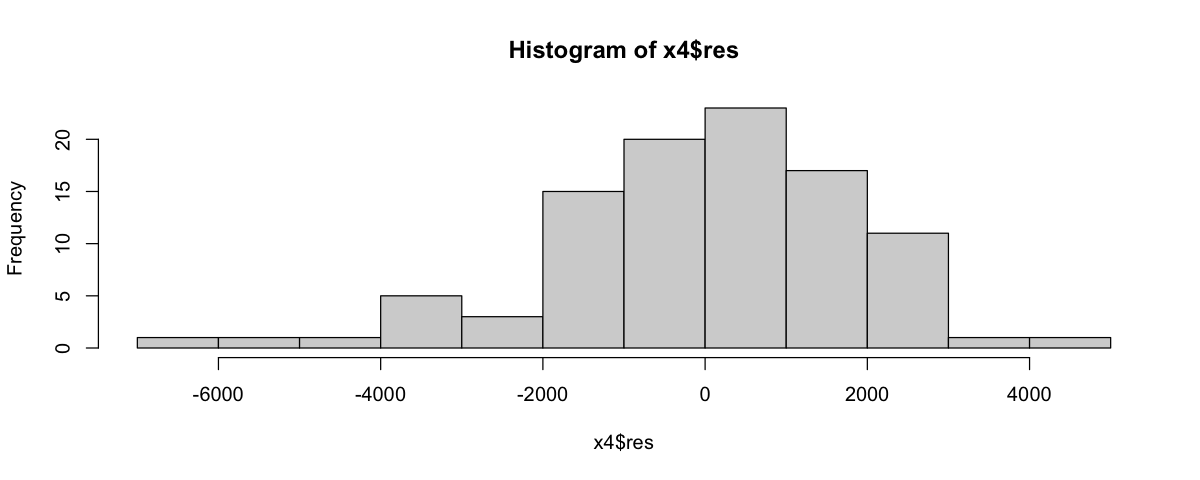

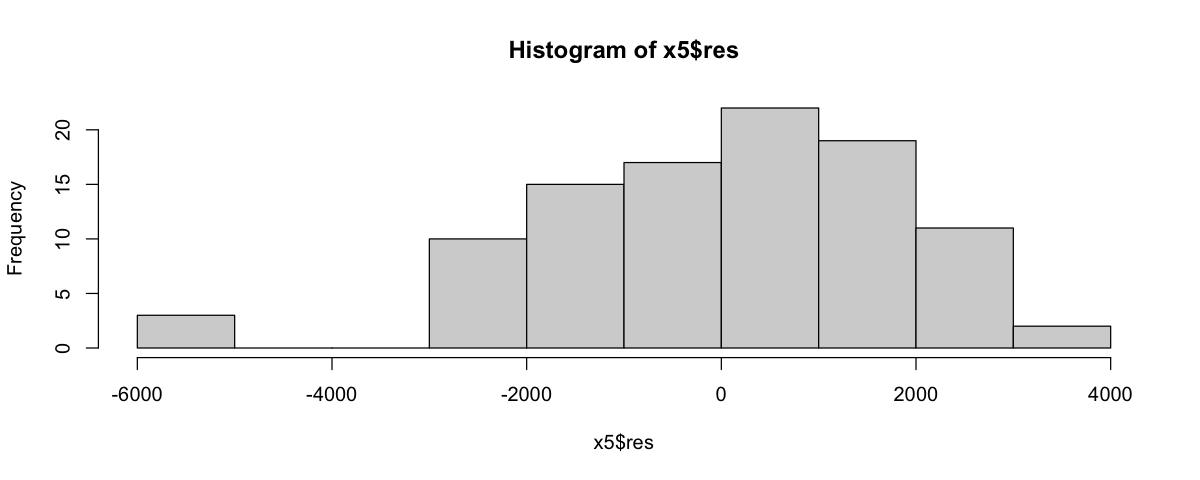

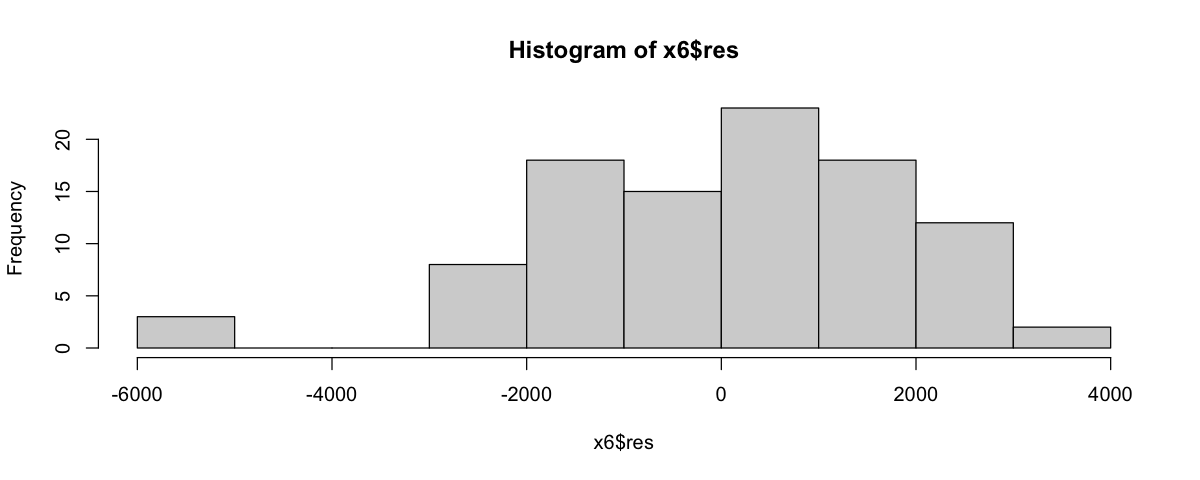

In [66]:
hist(x1$res) # ARIMA(1,1,0)  aic = 2784
hist(x2$res) # ARIMA(0,1,1)  aic = 2804
hist(x3$res) # ARIMA(1,1,1)  aic = 2783
hist(x4$res) # ARIMA(1,1,3)  aic = 2784
hist(x5$res) # ARIMA(2,1,3)  aic = 2783
hist(x6$res) # ARIMA(3,1,2)  aic = 2778
#hist(x7$res) # ARIMA(p,1,q)  

## quantile-quantile (QQ) plot.

A better graphical way in R to tell whether your data is distributed normally is to look at a so-called quantile-quantile (QQ) plot.

[1] 55 56

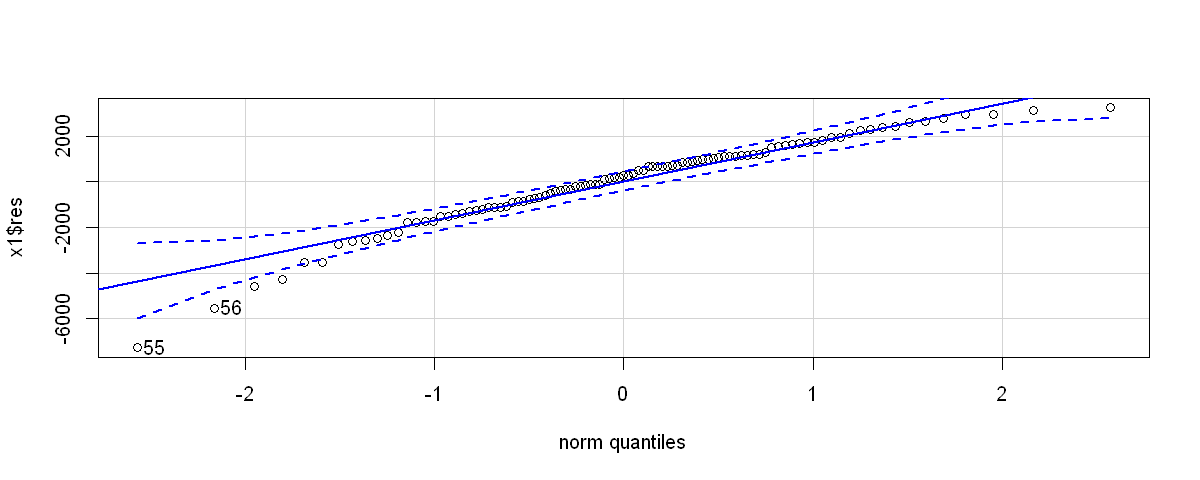

[1] 55 56

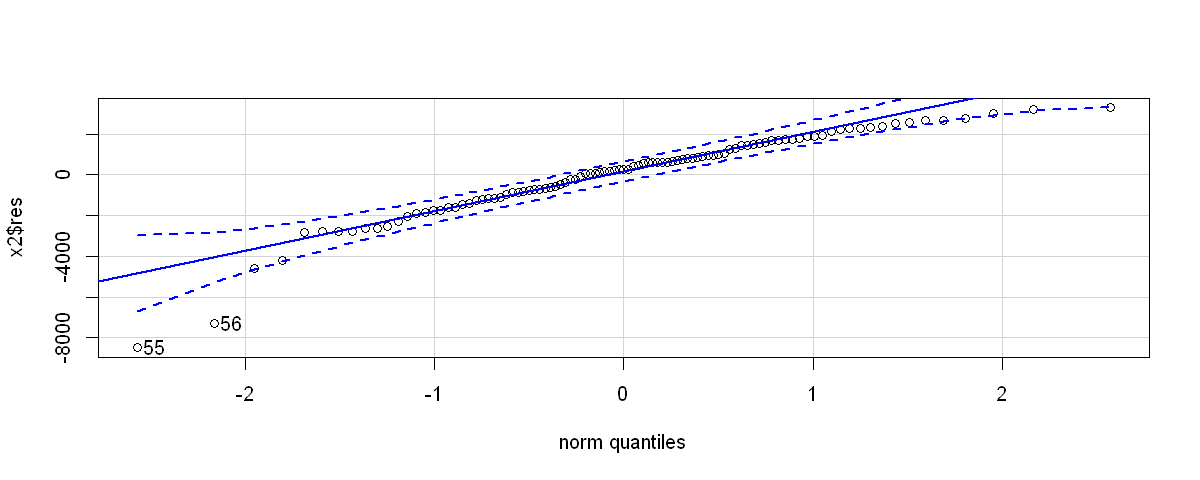

[1] 55 56

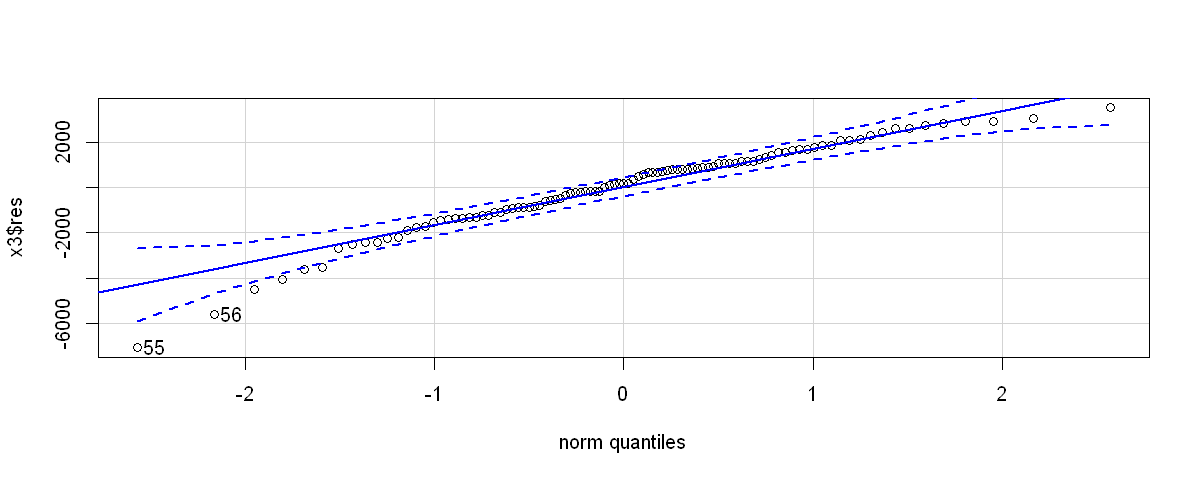

[1] 55 56

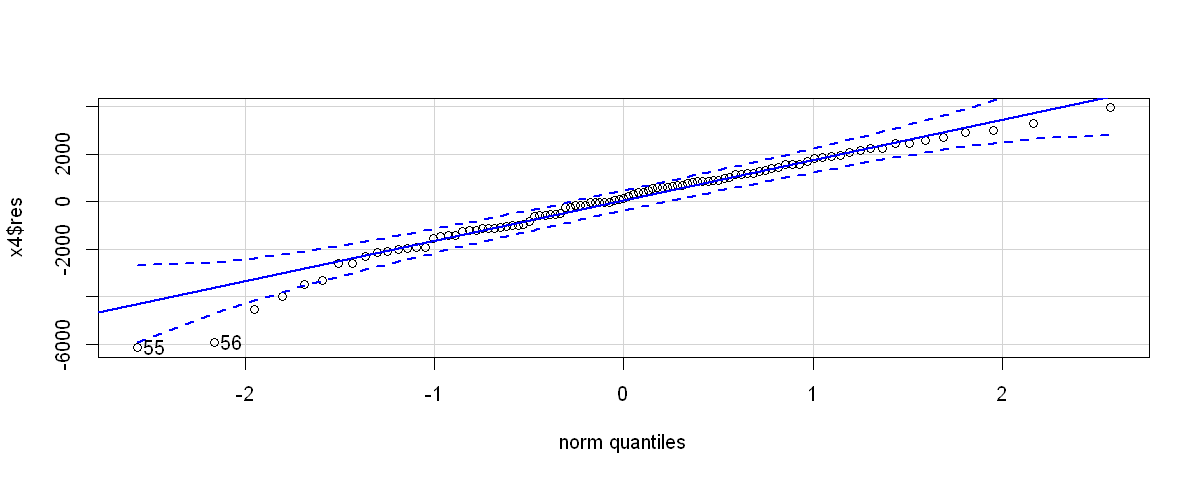

[1] 55 56

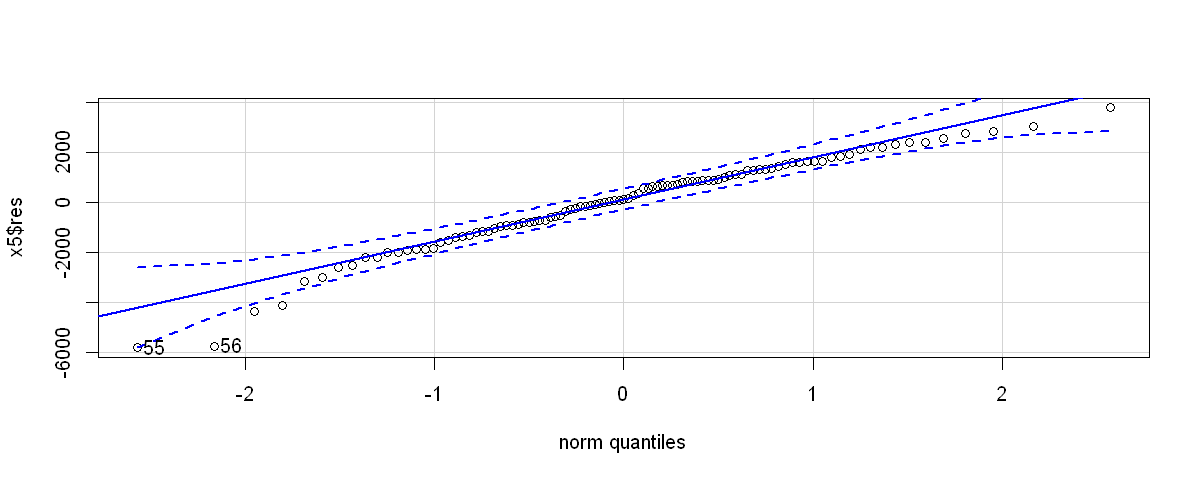

[1] 55 56

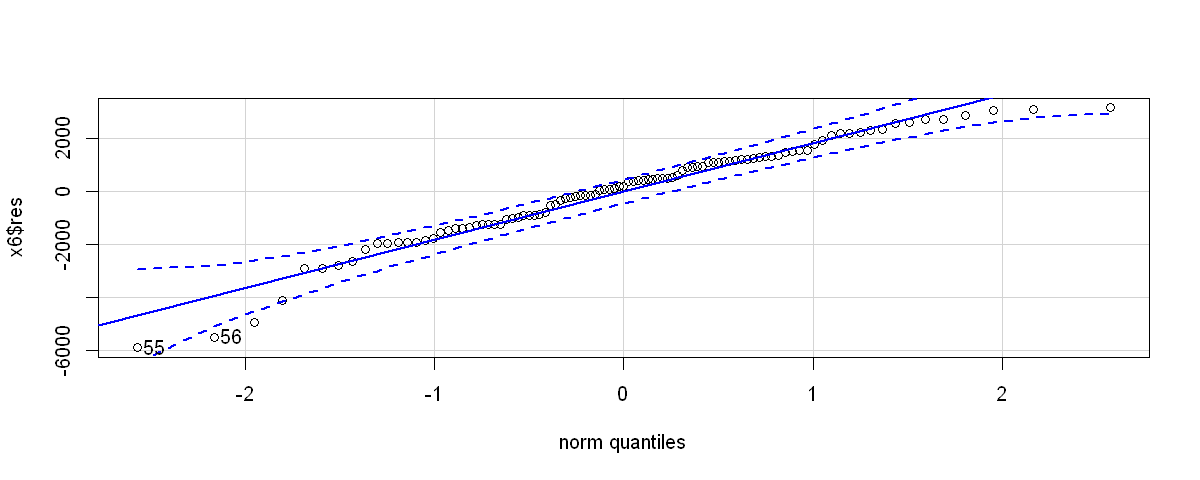

In [18]:
qqPlot(x1$res) # ARIMA(1,1,0)  aic = 2784
qqPlot(x2$res) # ARIMA(0,1,1)  aic = 2804
qqPlot(x3$res) # ARIMA(1,1,1)  aic = 2783
qqPlot(x4$res) # ARIMA(1,1,3)  aic = 2784
qqPlot(x5$res) # ARIMA(2,1,3)  aic = 2783
qqPlot(x6$res) # ARIMA(2,1,3)  aic = 2778

## 3.2 Check for independence by examining the ACF and PACF of the residuals, which should look like a white noise.

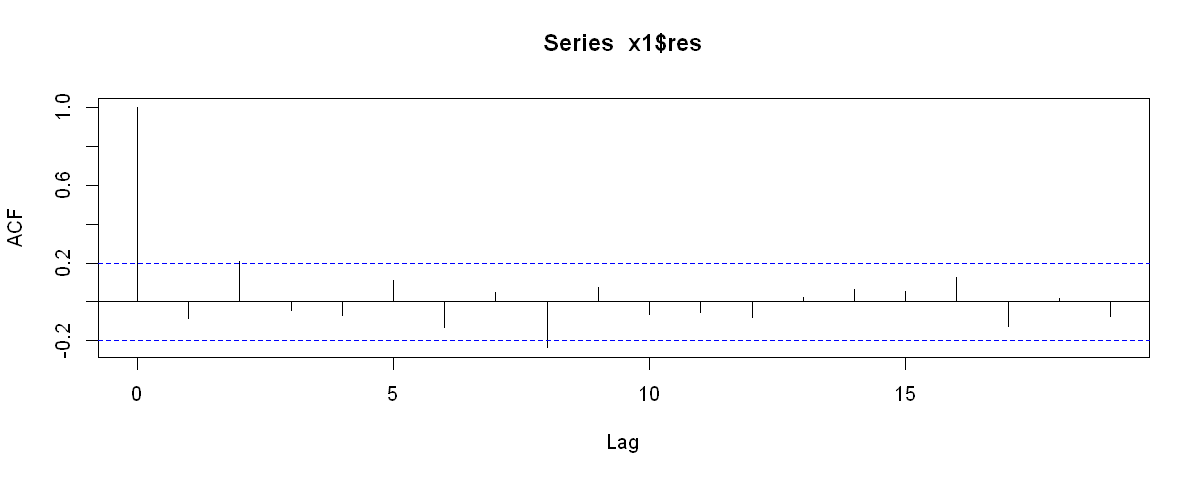

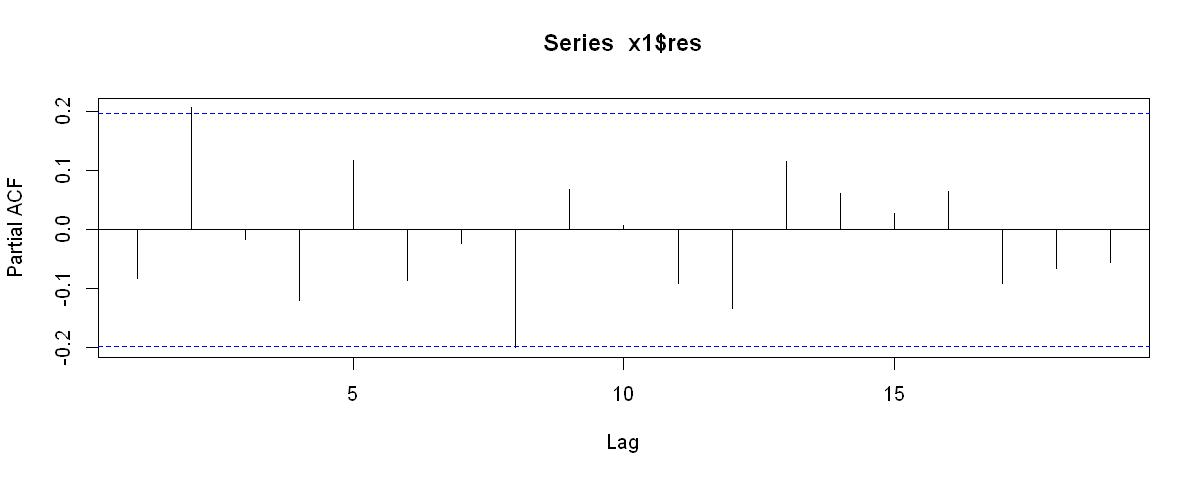

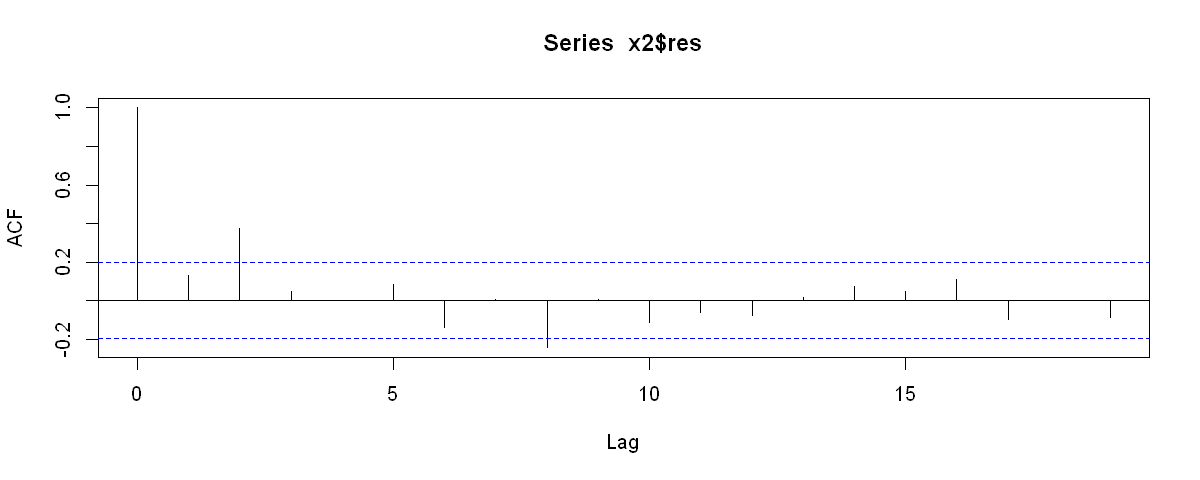

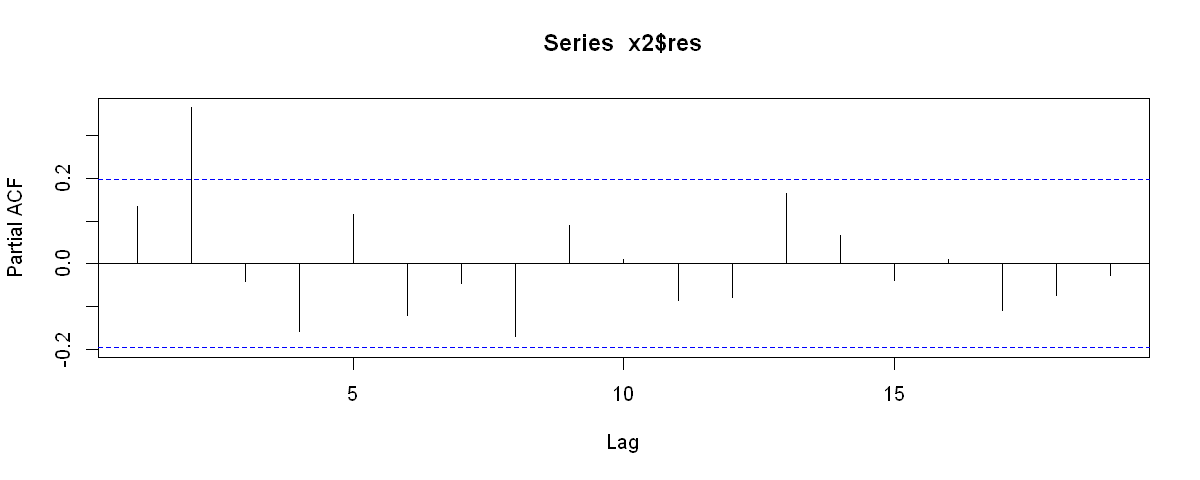

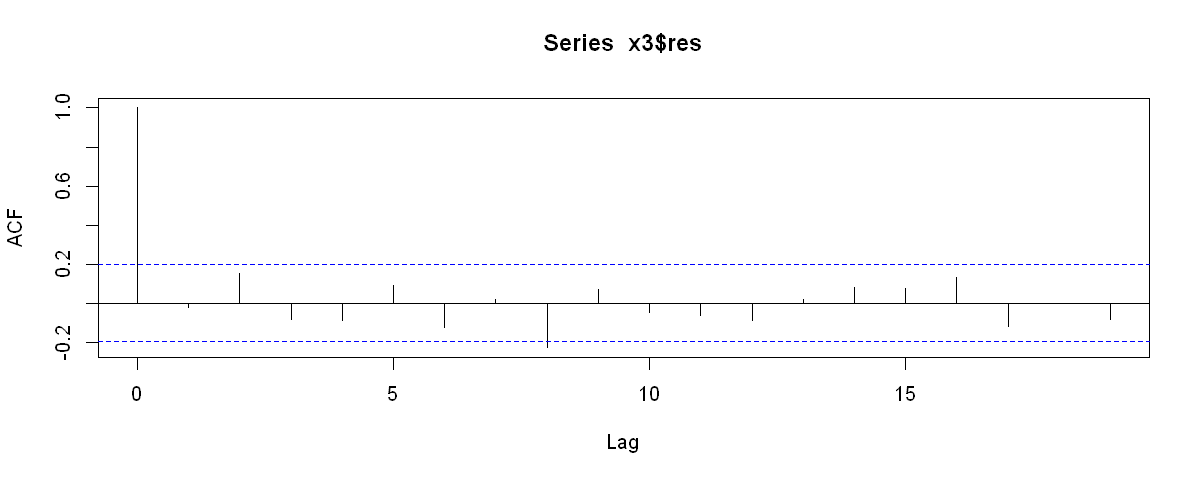

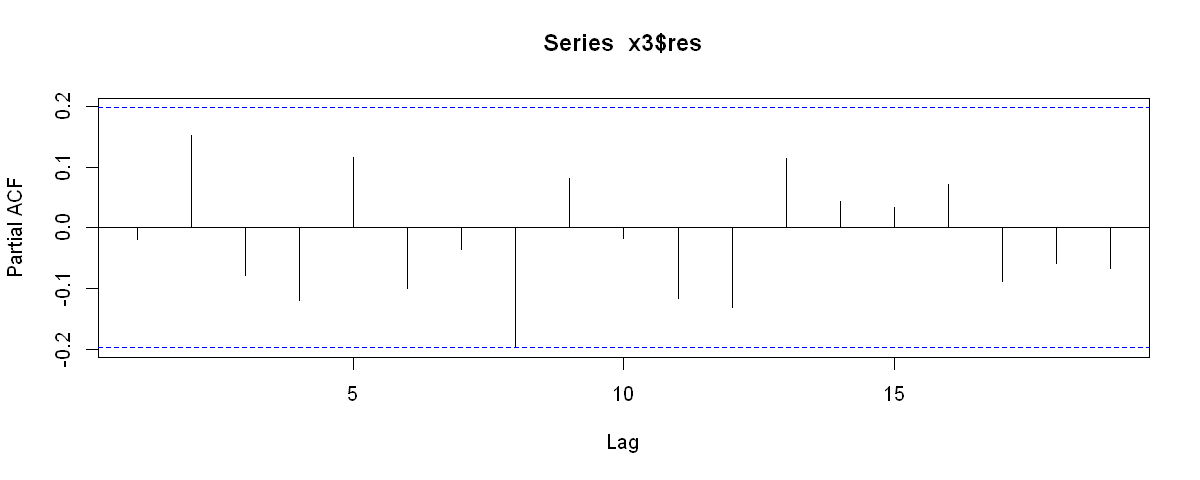

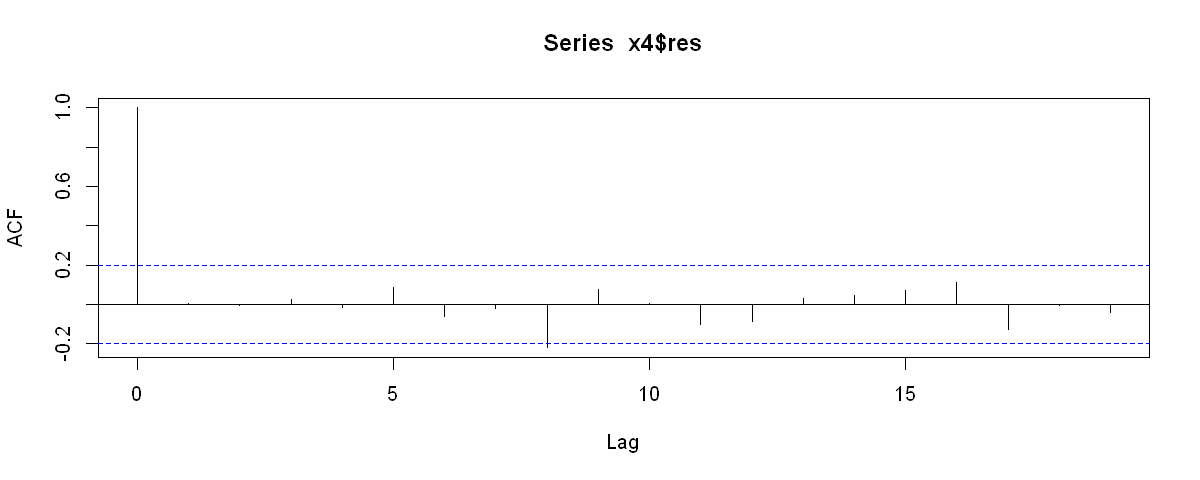

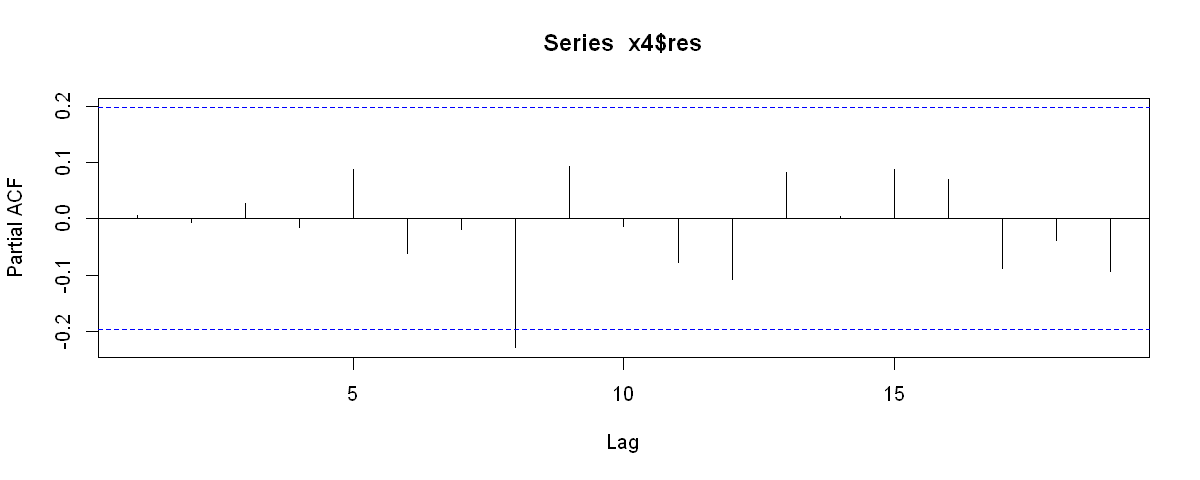

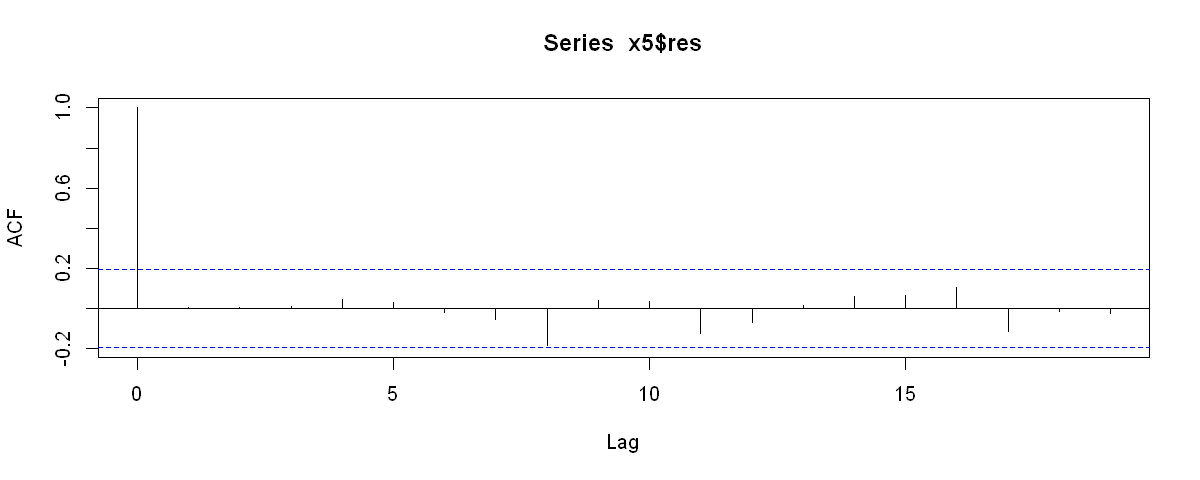

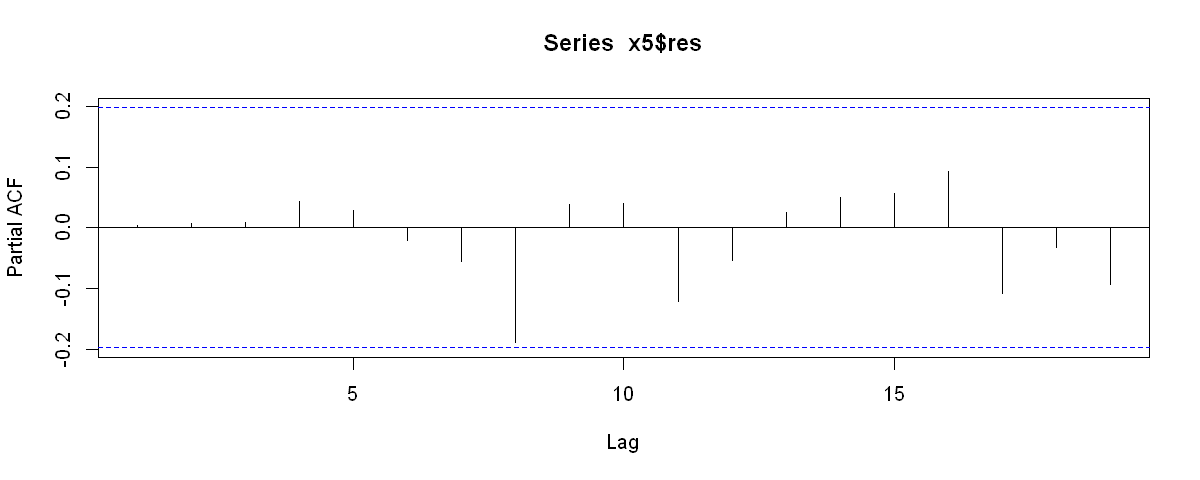

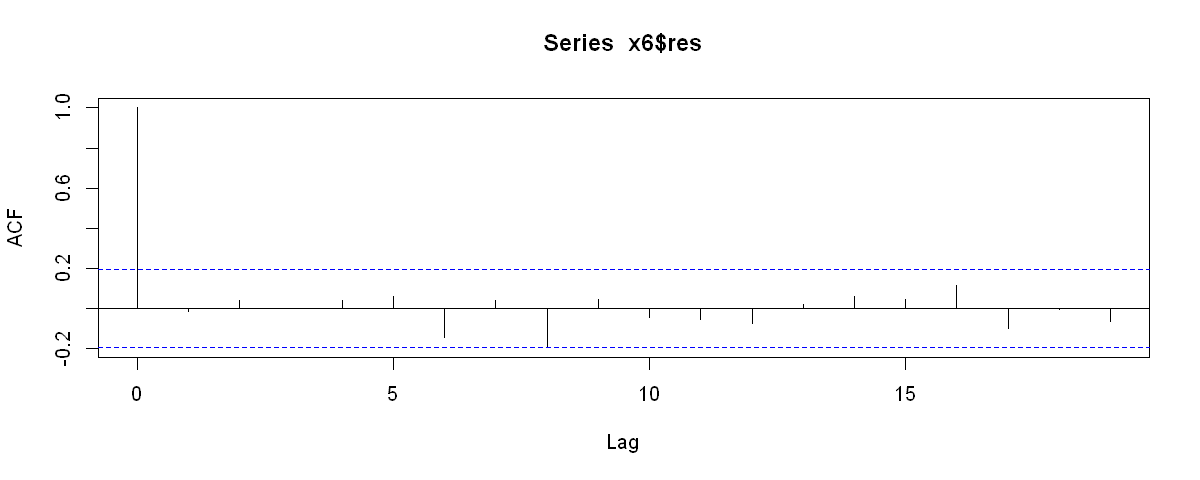

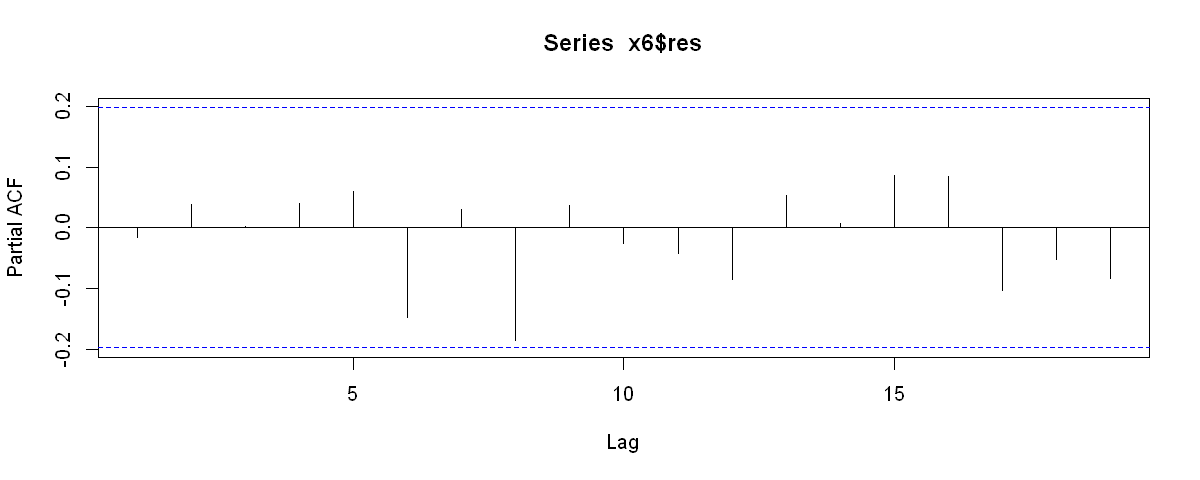

In [19]:
acf(x1$res)
pacf(x1$res)
acf(x2$res)
pacf(x2$res)
acf(x3$res)
pacf(x3$res)
acf(x4$res)
pacf(x4$res)
acf(x5$res)
pacf(x5$res)
acf(x6$res)
pacf(x6$res)

## 3.3 The Ljung-Box-Pierce statistic performs a test of the magnitude of the autocorrelations of the correlations as a group.

Compute the Box–Pierce or Ljung–Box test statistic for examining the null hypothesis of independence in a given time series. These are sometimes known as ‘portmanteau’ tests.


source: https://stat.ethz.ch/R-manual/R-devel/library/stats/html/box.test.html



In [20]:
Box.test(x6$res, type = "Ljung-Box", lag = 5) # ARIMA(3,1,2)  aic = 2778
Box.test(x6$res, type = "Ljung-Box", lag = 10)
Box.test(x6$res, type = "Ljung-Box", lag = 15)


	Box-Ljung test

data:  x6$res
X-squared = 0.74, df = 5, p-value = 1



	Box-Ljung test

data:  x6$res
X-squared = 7.5, df = 10, p-value = 0.7



	Box-Ljung test

data:  x6$res
X-squared = 9.2, df = 15, p-value = 0.9


Using the Box Ljung test, we cannot reject the null hypothesis.

In [21]:
Box.test(x1$res, type = "Ljung-Box", lag = 5)  # ARIMA(1,1,0)  aic = 2784
Box.test(x1$res, type = "Ljung-Box", lag = 10) 
Box.test(x1$res, type = "Ljung-Box", lag = 15)

Box.test(x2$res, type = "Ljung-Box", lag = 5)  # ARIMA(0,1,1)  aic = 2804
Box.test(x2$res, type = "Ljung-Box", lag = 10)
Box.test(x2$res, type = "Ljung-Box", lag = 15)

Box.test(x3$res, type = "Ljung-Box", lag = 5) # ARIMA(1,1,1)  aic = 2783
Box.test(x3$res, type = "Ljung-Box", lag = 10)
Box.test(x3$res, type = "Ljung-Box", lag = 15)

Box.test(x4$res, type = "Ljung-Box", lag = 5) # ARIMA(1,1,3)  aic = 2784
Box.test(x4$res, type = "Ljung-Box", lag = 10) 
Box.test(x4$res, type = "Ljung-Box", lag = 15)

Box.test(x5$res, type = "Ljung-Box", lag = 5) # ARIMA(2,1,3)  aic = 2783
Box.test(x5$res, type = "Ljung-Box", lag = 10)
Box.test(x5$res, type = "Ljung-Box", lag = 15)


	Box-Ljung test

data:  x1$res
X-squared = 7.3, df = 5, p-value = 0.2



	Box-Ljung test

data:  x1$res
X-squared = 17, df = 10, p-value = 0.08



	Box-Ljung test

data:  x1$res
X-squared = 19, df = 15, p-value = 0.2



	Box-Ljung test

data:  x2$res
X-squared = 17, df = 5, p-value = 0.004



	Box-Ljung test

data:  x2$res
X-squared = 28, df = 10, p-value = 0.002



	Box-Ljung test

data:  x2$res
X-squared = 30, df = 15, p-value = 0.01



	Box-Ljung test

data:  x3$res
X-squared = 4.8, df = 5, p-value = 0.4



	Box-Ljung test

data:  x3$res
X-squared = 13, df = 10, p-value = 0.2



	Box-Ljung test

data:  x3$res
X-squared = 16, df = 15, p-value = 0.4



	Box-Ljung test

data:  x4$res
X-squared = 0.89, df = 5, p-value = 1



	Box-Ljung test

data:  x4$res
X-squared = 7.4, df = 10, p-value = 0.7



	Box-Ljung test

data:  x4$res
X-squared = 10, df = 15, p-value = 0.8



	Box-Ljung test

data:  x5$res
X-squared = 0.3, df = 5, p-value = 1



	Box-Ljung test

data:  x5$res
X-squared = 4.7, df = 10, p-value = 0.9



	Box-Ljung test

data:  x5$res
X-squared = 8, df = 15, p-value = 0.9


## 3.4 Examine goodness of fit using the Akaike Information Criteria (AIC) and Bayesian Information Criteria (BIC). Use most parsimonious model with lowest AIC and/or BIC

#### x1  # ARIMA(1,1,0)   aic = 2784
#### x2  # ARIMA(0,1,1)   aic = 2804
#### x3  # ARIMA(1,1,1)   aic = 2783
#### x4  # ARIMA(1,1,3)   aic = 2784
#### x5  # ARIMA(2,1,3)   aic = 2783
#### x6  # ARIMA(3,1,2)   aic = 2778



## Best Model :  ARIMA(3,1,2)   aic = 2778